In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

In [80]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
plt.style.use("ggplot")
pd.set_option('mode.chained_assignment',  None)

In [81]:
traffic_2018_01=pd.read_csv('data/2018_01분기.csv',encoding='cp949')
traffic_2018_02=pd.read_csv('data/2018_02분기.csv',encoding='cp949')
traffic_2018_03=pd.read_csv('data/2018_03분기.csv',encoding='cp949')
traffic_2018_04=pd.read_csv('data/2018_04분기.csv',encoding='cp949')
traffic_2019_01=pd.read_csv('data/2019_01분기.csv',encoding='cp949')
traffic_2019_02=pd.read_csv('data/2019_02분기.csv',encoding='cp949')
traffic_2019_03=pd.read_csv('data/2019_03분기.csv',encoding='cp949')
traffic_2019_04=pd.read_csv('data/2019_04분기.csv',encoding='cp949')
traffic_2020_01=pd.read_csv('data/2020_01분기.csv',encoding='cp949')
traffic_2020_02=pd.read_csv('data/2020_02분기.csv',encoding='cp949')
traffic_2020_03=pd.read_csv('data/2020_03분기.csv',encoding='cp949')
traffic_2020_04=pd.read_csv('data/2020_04분기.csv',encoding='cp949')
traffic_2021_01=pd.read_csv('data/2021_01분기.csv',encoding='cp949')
traffic_2021_02=pd.read_csv('data/2021_02분기.csv',encoding='cp949')

In [82]:
traffic_data=pd.concat([traffic_2018_01,traffic_2018_02,traffic_2018_03,traffic_2018_04,
                        traffic_2019_01,traffic_2019_02,traffic_2019_03,traffic_2019_04,
                        traffic_2020_01,traffic_2020_02,traffic_2020_03,traffic_2020_04,
                        traffic_2021_01,traffic_2021_02])
traffic_data.head()

,집계일자,영업소코드,영업소명,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,20180101,246,가락,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,211,6,6,21,27,4,275
1,20180101,246,가락,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,615,14,5,14,96,26,770
2,20180101,29,가락(개),0,입구,1,TCS,0,한국도로공사,1,개방식,2358,31,48,57,131,273,2898
3,20180101,29,가락(개),0,입구,2,hi-pass,0,한국도로공사,1,개방식,7148,27,71,27,267,378,7918
4,20180101,29,가락(개),1,출구,1,TCS,0,한국도로공사,1,개방식,2946,29,52,48,150,357,3582


In [83]:
traffic_data.index=traffic_data.집계일자
traffic_data=traffic_data.drop('집계일자',axis=1)
traffic_data=traffic_data[['영업소명','1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량']]
traffic_data.index=pd.to_datetime(traffic_data.index, format='%Y%m%d')
traffic_data['year']=traffic_data.index.year 
traffic_data['month']=traffic_data.index.month
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
traffic_data['day_of_week']=traffic_data.index.dayofweek 
traffic_data.day_of_week=traffic_data.day_of_week.apply(lambda x : days[x])
traffic_data.head()

,영업소명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,,
2018-01-01,가락,211,6,6,21,27,4,275,2018,1,MON
2018-01-01,가락,615,14,5,14,96,26,770,2018,1,MON
2018-01-01,가락(개),2358,31,48,57,131,273,2898,2018,1,MON
2018-01-01,가락(개),7148,27,71,27,267,378,7918,2018,1,MON
2018-01-01,가락(개),2946,29,52,48,150,357,3582,2018,1,MON


In [84]:
gn_traffic_data=traffic_data[(traffic_data['영업소명']=='강릉')|(traffic_data['영업소명']=='북강릉')|(traffic_data['영업소명']=='남강릉')]
gn_traffic_data=gn_traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
gn_traffic_data['year']=gn_traffic_data.index.year
gn_traffic_data['month']=gn_traffic_data.index.month
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
gn_traffic_data['day_of_week']=gn_traffic_data.index.dayofweek
gn_traffic_data.day_of_week=gn_traffic_data.day_of_week.apply(lambda x : days[x])
gn_traffic_data.head()

C:\Users\user\AppData\Local\Temp/ipykernel_12504/3635469098.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gn_traffic_data=gn_traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()


,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,
2018-01-01,64644,371,1547,125,155,2149,68991,2018,1,MON
2018-01-02,32980,710,1874,529,747,1323,38163,2018,1,TUE
2018-01-03,30186,876,1978,657,911,1335,35943,2018,1,WED
2018-01-04,31207,919,2037,707,962,1275,37107,2018,1,THU
2018-01-05,34516,901,2068,715,1014,1477,40691,2018,1,FRI


In [85]:
traffic_data=traffic_data.replace('북강릉영업소','북강릉')
traffic_data=traffic_data.replace('남강릉영업소','남강릉')
traffic_data=traffic_data.replace('강릉영업소','강릉')

<AxesSubplot:title={'center':"The Gangneung's Traffic Trend By Year And Month"}, xlabel='month', ylabel='총교통량'>

c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44368 missing from cur

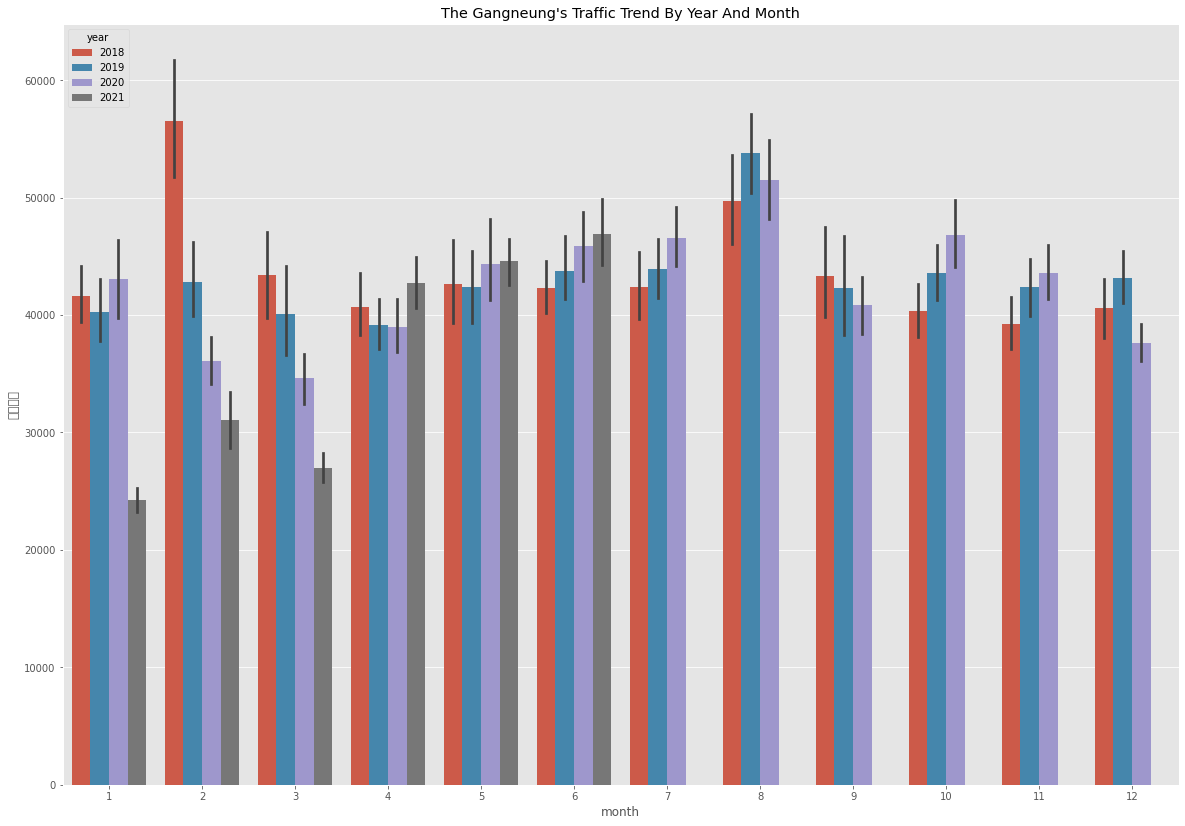

In [86]:
plt.figure(figsize=(20,14))
plt.title('The Gangneung\'s Traffic Trend By Year And Month')
sns.barplot(x='month', y='총교통량',hue='year',data=gn_traffic_data)

<AxesSubplot:title={'center':"\nTrend Of Gangneung's First Class Traffic On Saturday (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44368 missing from c

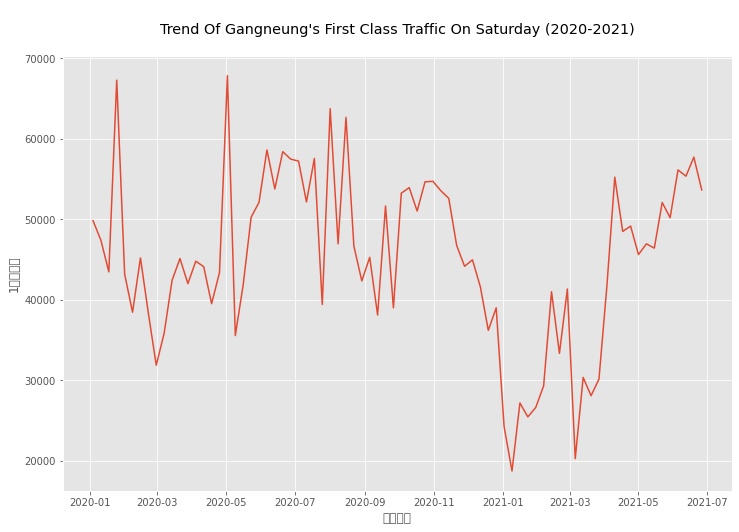

In [87]:
# 1종 교통량(대부분의 자가용) 토요일 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Gangneung\'s First Class Traffic On Saturday (2020-2021)\n')
sns.lineplot(data=gn_traffic_data[(gn_traffic_data.day_of_week=='SAT')&((gn_traffic_data.year==2020)|(gn_traffic_data.year==2021))], x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':"\nTrend Of Gangneung's First Class Traffic On Sunday (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44368 missing from c

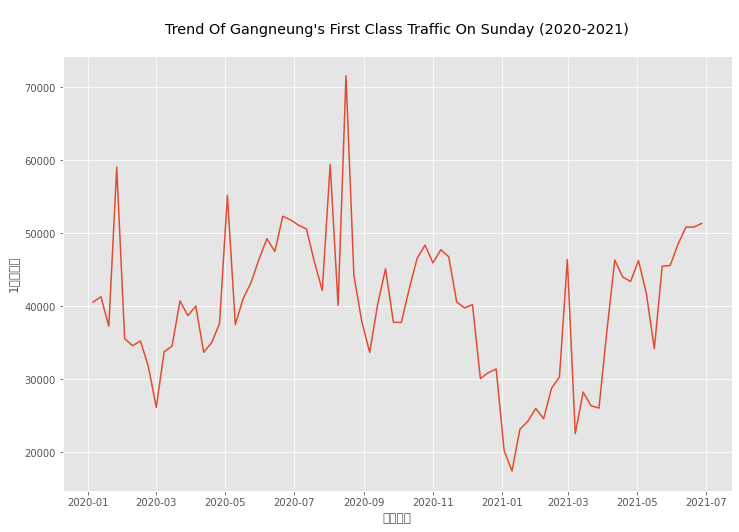

In [88]:
# 1종 교통량(대부분의 자가용) 일요일 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Gangneung\'s First Class Traffic On Sunday (2020-2021)\n')
sns.lineplot(data=gn_traffic_data[(gn_traffic_data.day_of_week=='SUN')&((gn_traffic_data.year==2020)|(gn_traffic_data.year==2021))], x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':"\nTrend Of Gangneung's First Class Traffic On Weekdays (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44368 missing from c

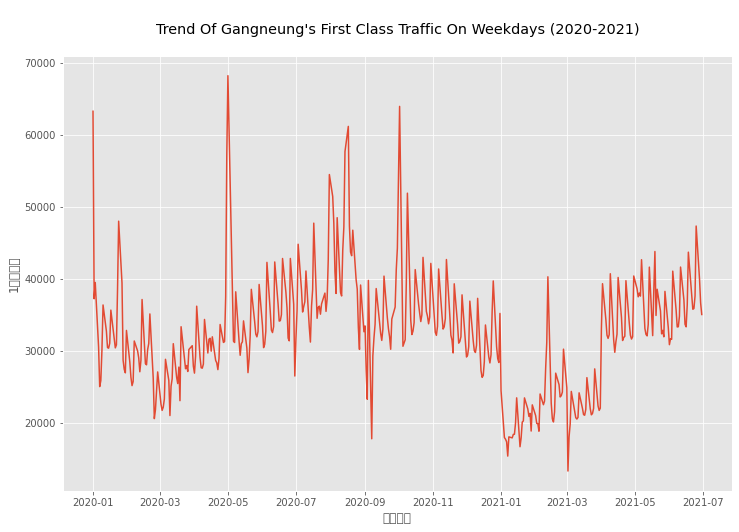

In [89]:
# 1종 교통량(대부분의 자가용) 주중 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Gangneung\'s First Class Traffic On Weekdays (2020-2021)\n')
sns.lineplot(data=seoul_traffic_data[((gn_traffic_data.day_of_week=='MON')
                                    |(gn_traffic_data.day_of_week=='TUE')
                                    |(gn_traffic_data.day_of_week=='WED')
                                    |(gn_traffic_data.day_of_week=='THU')
                                    |(gn_traffic_data.day_of_week=='FRI'))
                                    &((gn_traffic_data.year==2020)|(gn_traffic_data.year==2021))], x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':"\nTrend Of Gangneung's First Class Traffic On Weekend (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44368 missing from c

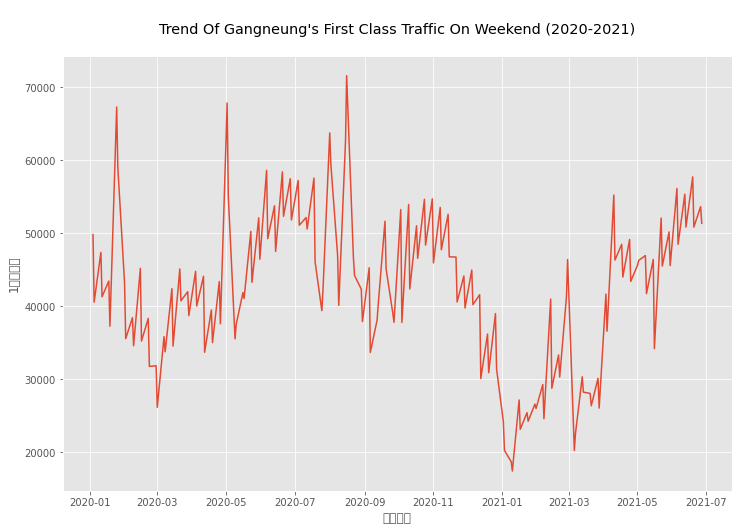

In [90]:
# 1종 교통량(대부분의 자가용) 주말 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Gangneung\'s First Class Traffic On Weekend (2020-2021)\n')
sns.lineplot(data=gn_traffic_data[((gn_traffic_data.day_of_week=='SUN')|(gn_traffic_data.day_of_week=='SAT'))&((gn_traffic_data.year==2020)|(gn_traffic_data.year==2021))], x='집계일자', y='1종교통량')

In [91]:
gn_weekdays_first_median_2018_2021=gn_traffic_data[((gn_traffic_data.day_of_week=='MON')
                                                        |(gn_traffic_data.day_of_week=='TUE')
                                                        |(gn_traffic_data.day_of_week=='WED')
                                                        |(gn_traffic_data.day_of_week=='THU')
                                                        |(gn_traffic_data.day_of_week=='FRI'))]['1종교통량'].median()
gn_weekdays_first_median_2018_2019=gn_traffic_data[((gn_traffic_data.day_of_week=='MON')
                                                        |(gn_traffic_data.day_of_week=='TUE')
                                                        |(gn_traffic_data.day_of_week=='WED')
                                                        |(gn_traffic_data.day_of_week=='THU')
                                                        |(gn_traffic_data.day_of_week=='FRI'))
                                                        &((gn_traffic_data.year==2018)|(gn_traffic_data.year==2019))]['1종교통량'].median()
print('2018-2021 주중 강릉시 1종 교통량 중앙값 : %.1f\n2018-2019 주중 강릉시 1종 교통량 중앙값 : %.1f'%(gn_weekdays_first_median_2018_2021,gn_weekdays_first_median_2018_2019))

2018-2021 주중 강릉시 1종 교통량 중앙값 : 31466.0
2018-2019 주중 강릉시 1종 교통량 중앙값 : 31221.5


<AxesSubplot:xlabel='집계일자', ylabel='1종교통량'>

c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44368 missing from c

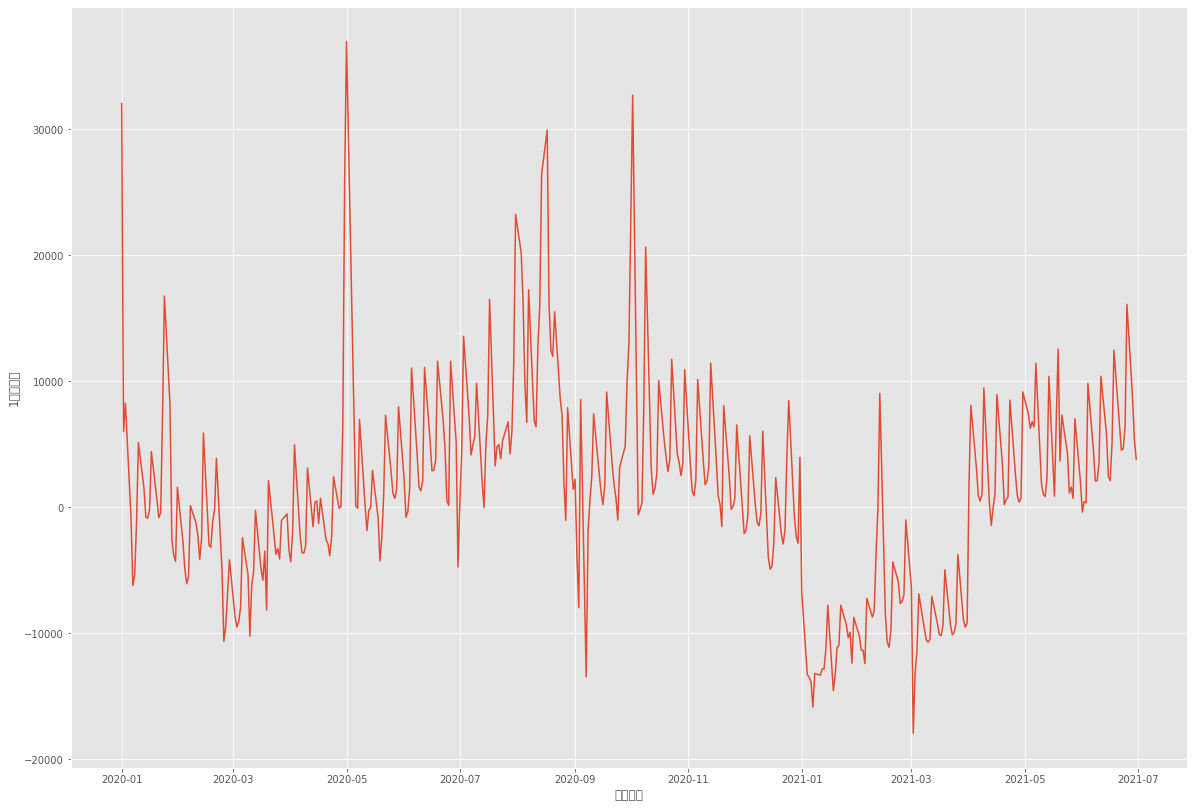

In [92]:
plt.figure(figsize=(20,14))
gn_weekdays_first_diff=pd.DataFrame(gn_traffic_data[((gn_traffic_data.day_of_week=='MON')
                                            |(gn_traffic_data.day_of_week=='TUE')
                                            |(gn_traffic_data.day_of_week=='WED')
                                            |(gn_traffic_data.day_of_week=='THU')
                                            |(gn_traffic_data.day_of_week=='FRI'))
                                            &((gn_traffic_data.year==2020)|(gn_traffic_data.year==2021))]['1종교통량']-gn_weekdays_first_median_2018_2019)

gn_weekdays_first_diff['집계일자']=gn_weekdays_first_diff.index
sns.lineplot(data=gn_weekdays_first_diff,x='집계일자', y='1종교통량')

<AxesSubplot:title={'center':"The Gangneung's Traffic Trend By Year And Month"}, xlabel='month', ylabel='1종교통량'>

c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44368 missing from cur

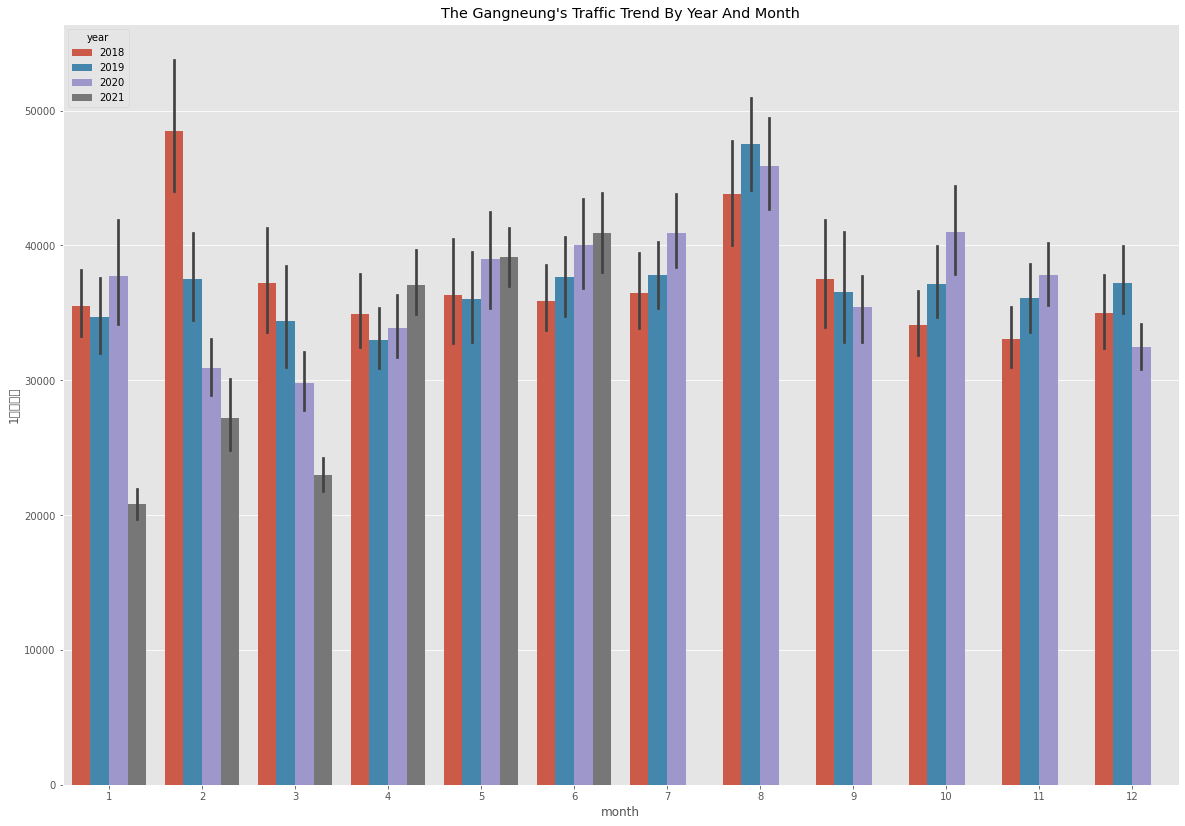

In [93]:
# 월별, 연도별 총교통량 추이

plt.figure(figsize=(20,14))
plt.title('The Gangneung\'s Traffic Trend By Year And Month')
sns.barplot(x='month', y='1종교통량',hue='year',data=gn_traffic_data)

<AxesSubplot:title={'center':"\nTrend Of Gangnueng's First Class Traffic On Weekdays (2020-2021)\n"}, xlabel='집계일자', ylabel='2종교통량'>

c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44368 missing from c

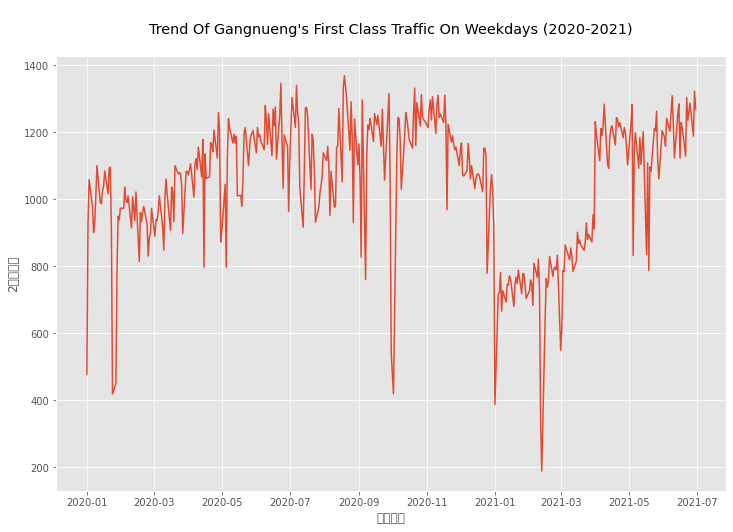

In [94]:
# 2종 교통량(중형차) 주중 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Gangnueng\'s First Class Traffic On Weekdays (2020-2021)\n')
sns.lineplot(data=gn_traffic_data[((gn_traffic_data.day_of_week=='MON')
                                      |(gn_traffic_data.day_of_week=='TUE')
                                      |(gn_traffic_data.day_of_week=='WED')
                                      |(gn_traffic_data.day_of_week=='THU')
                                      |(gn_traffic_data.day_of_week=='FRI'))
                                      &((gn_traffic_data.year==2020)|(gn_traffic_data.year==2021))],
                                      x='집계일자', y='2종교통량')

<AxesSubplot:title={'center':"\nTrend Of Gangneung's First Class Traffic On Saturday (2020-2021)\n"}, xlabel='집계일자', ylabel='2종교통량'>

c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44368 missing from c

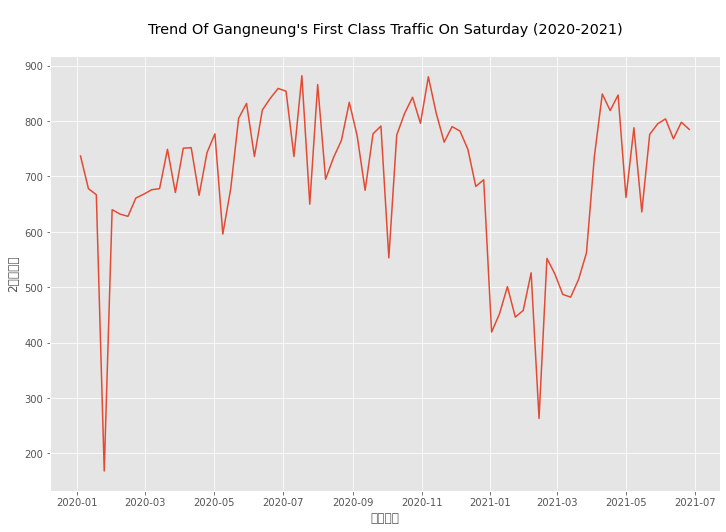

In [95]:
# 2종 교통량(중형차) 토요일 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Gangneung\'s First Class Traffic On Saturday (2020-2021)\n')
sns.lineplot(data=gn_traffic_data[(gn_traffic_data.day_of_week=='SAT')
                                      &((gn_traffic_data.year==2020)|(gn_traffic_data.year==2021))],
                                      x='집계일자', y='2종교통량')

<AxesSubplot:title={'center':"\nTrend Of Gangneung's First Class Traffic On Sunday (2020-2021)\n"}, xlabel='집계일자', ylabel='2종교통량'>

c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44368 missing from c

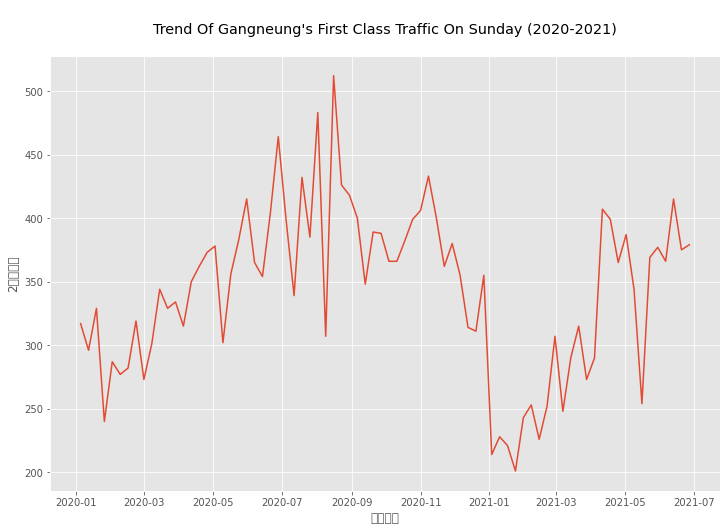

In [96]:
# 2종 교통량(중형차) 일요일 분석

plt.figure(figsize=(12,8)) 
plt.title('\nTrend Of Gangneung\'s First Class Traffic On Sunday (2020-2021)\n')
sns.lineplot(data=gn_traffic_data[(gn_traffic_data.day_of_week=='SUN')
                                      &((gn_traffic_data.year==2020)|(gn_traffic_data.year==2021))],
                                      x='집계일자', y='2종교통량')

<AxesSubplot:title={'center':"The Gangneung's Traffic Trend By Year And Month"}, xlabel='month', ylabel='2종교통량'>

c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44368 missing from cur

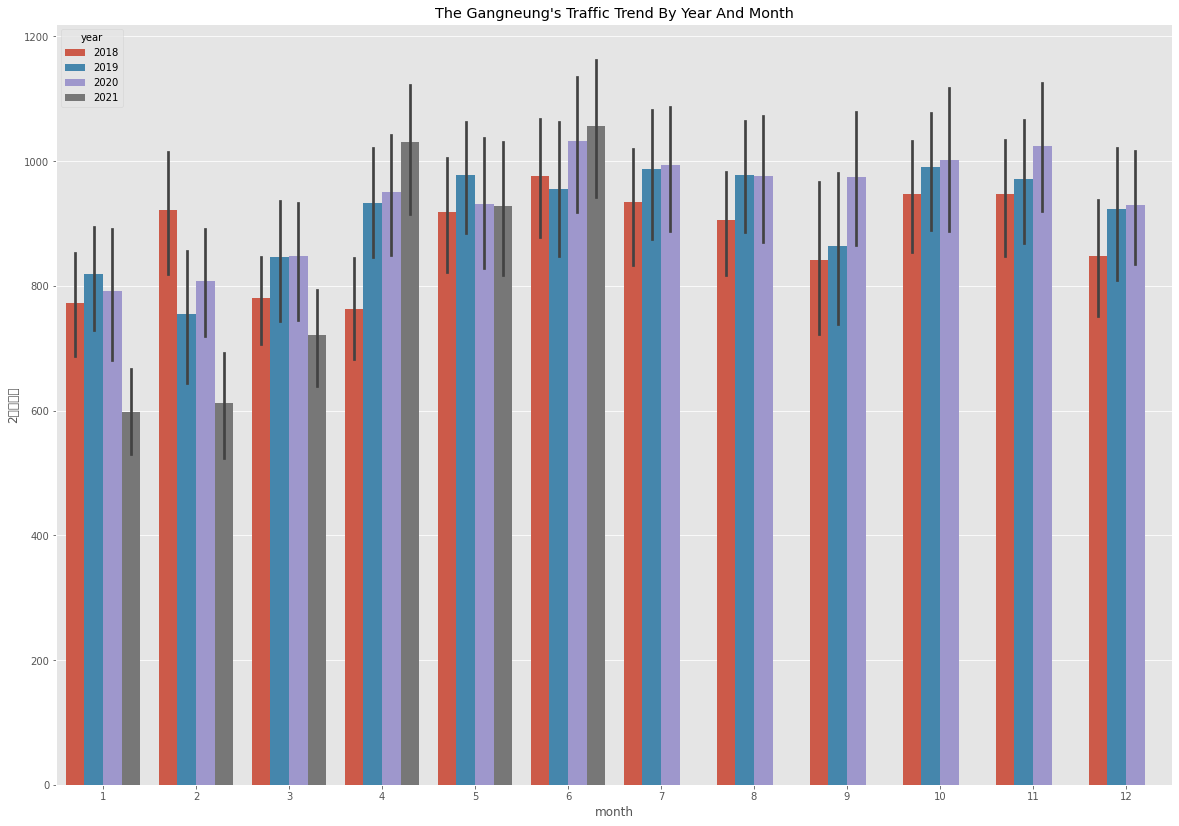

In [98]:
# 월별, 연도별 총교통량 추이

plt.figure(figsize=(20,14))
plt.title('The Gangneung\'s Traffic Trend By Year And Month')
sns.barplot(x='month', y='2종교통량',hue='year',data=gn_traffic_data)